In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("../dataset/heart.csv")

In [5]:
# Initialize LabelEncoder.
label_encoder = LabelEncoder()

# Select columns with categorical data.
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column.
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [6]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
# Base models.
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
ensemble = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn)],
    voting='soft'  # soft - average predicted probabilities from each model.
                   # hard - majority vote from each model. 
)

In [11]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [12]:
y_pred = ensemble.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68  9]
 [14 93]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



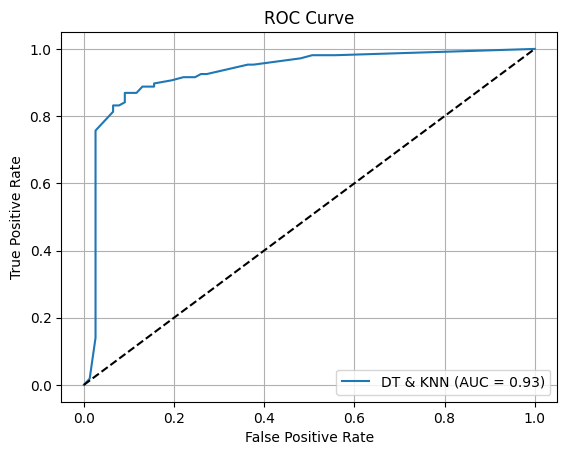

In [14]:
# Get predicted probabilities.
y_probs = ensemble.predict_proba(X_test)[:, 1]

# ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f'DT & KNN (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()